In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from numpy import roots
import numpy as np

In [ ]:
hoja1 = pd.read_excel("/datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"])
hoja2 = pd.read_excel("/datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"])
hoja3 = pd.read_excel("/datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"])

# Sección nueva

# **HOJA 1**

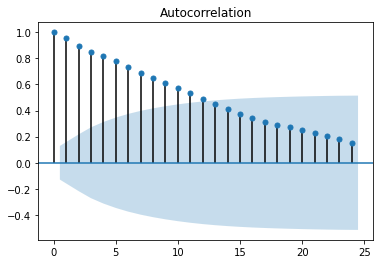

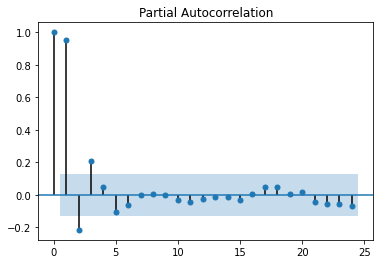

In [ ]:
plot_acf(hoja1.valor)
plt.show()
plot_pacf(hoja1.valor, method="ywm")
plt.show()

In [ ]:
#Segun la grafica seria un modelo cola - corte que corresponde a un AR(3)
#Y como se han usado diferencias a un quedaria un modelo ARIMA(3,0,0)
#Tambien se va a intentar con corte - corte con un modelo ARIMA(12,0,0) y ARIMA(0,0,3)

En la gráfica **ACF**, evidenciamos que los 12 primeros rezagos sobrepasan la banda de confianza del 95%. Esto quiere decir que hasta allí, existe un comportamiento estacional. Esta tendencia demuestra que existe una alta correlación de cada dato con sus respectivos valores anteriores.  El resto de rezagos se encuentran dentro de la banda de confianza, demostrando que no existe una correlación entre los datos.

En la **PACF**, podemos notar que los 3 primeros rezagos sobresalen por fuera de la banda de confianza del 95%, por consiguiente existe un comportamiento estacional. El resto de lags, oscilan alrededor del 0 y por dentro de la banda de confianza, allí no hay correlación entre los datos. De los rezagos que sobresalen de la banda, se puede decir que están fuertemente correlacionados con sus valores anteriores, para los lags 1 y 3 de manera positiva y para el lag 2 de forma negativa.

(-0.6940413117038657,
 0.8482869409753933,
 3,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 618.5147960822515)

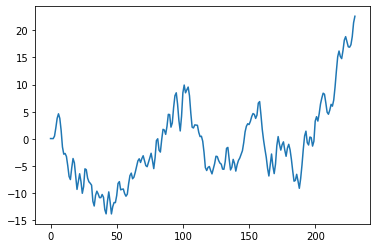

In [ ]:
hoja1.valor.plot()
adfuller(hoja1.valor)  # Se tiene un p-valor de 0.84 > 0.05 por lo que no es estacionaria y se procede a tomar una diferencia

In [ ]:
adfuller(hoja1.valor.diff().dropna()) #p valor <0.05: Si estacionario (Solo fue una diferencia d = 1)

(-6.904972776072946,
 1.2540124522200221e-09,
 2,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 612.6121479835192)

Al realizar la prueba de Dickey-Fuller, obtenemos un p-valor de **0.84>0.05**. con este resultado, aparte de reconocer que no es estacionaria, rechazamos la hipótesis nula de que existe una raíz nula, lo cual indica que que debemos tomar una diferencia.

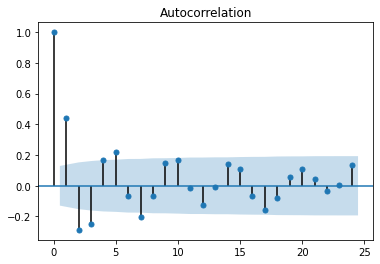

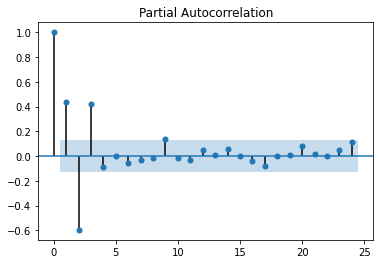

In [ ]:
plot_acf(hoja1.valor.diff().dropna())
plt.show()
plot_pacf(hoja1.valor.diff().dropna(), method="ywm")
plt.show()

En éste **ACF**, sobresalen de la banda de confianza del 95% los 5 primeros lags y el lag número 7. Ellos poseen un comportamiento estacional y correlación de los datos con sus resultados anteriores. Cada 2 o 3 rezagos oscilan por encima o por debajo del 0 siguiendo una aparente tendencia dentro de la banda de confianza.

En su **PACF**, los lags 1, 2 y 3 sobresalen por fuera de la banda de confianza del 95% y el resto de rezagos se encuentran por dentro de ella. Los lags 1 y 3 indican que cada dato está correlacionado fuertemente con el valor  anterior de manera positiva, mientras que el lag 2 está fuertemente correlacionado con su valor anterior pero de forma negativa.

-
Cola - Corte en 3 AR(3) ARIMA(3,1,0)
-
 Corte 5 - Corte 3 ARIMA(5,1,0) ~ ARIMA(0,1,3) ~ ARIMA(3,1,0) ~ ARIMA(0,1,5) ~ ARIMA(5,1,3)



In [ ]:
mol1 = ARIMA(hoja1.valor, order = (3,1,0)).fit()
mol2 = ARIMA(hoja1.valor,order = (5,1,0)).fit()
mol3 = ARIMA(hoja1.valor, order = (0,1,3)).fit()
mol4 = ARIMA(hoja1.valor,order = (0,1,3)).fit()
mol5 = ARIMA(hoja1.valor,order = (0,1,5)).fit()
mol6 = ARIMA(hoja1.valor,order = (5,1,3)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
mol1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Tue, 04 Oct 2022   AIC                            657.723
Time:                        02:27:23   BIC                            671.475
Sample:                             0   HQIC                           663.270
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -323.978
Date:                Tue, 04 Oct 2022   AIC                            659.957
Time:                        02:27:26   BIC                            680.585
Sample:                             0   HQIC                           668.278
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9878      0.066     14.892      0.000       0.858       1.118
ar.L2         -0.9659      0.096    -10.056      0.000      -1.154      -0.778
ar.L3          0.5030      0.114      4.420      0.000       0.280       0.726
ar.L4         -0.0909      0.096     -0.943      0.346      -0.280       0.098
ar.L5          0.0034      0.068      0.050      0.960      -0.131       0.138
sigma2         0.9724      0.102      9.545      0.000       0.773       1.172
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.98   Prob(JB):                         0.48
Heteroskedasticity (H):               1.18   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -335.758
Date:                Tue, 04 Oct 2022   AIC                            679.517
Time:                        02:27:28   BIC                            693.269
Sample:                             0   HQIC                           685.064
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9225      0.066     14.068      0.000       0.794       1.051
ma.L2         -0.0342      0.087     -0.393      0.694      -0.205       0.136
ma.L3         -0.2473      0.069     -3.594      0.000      -0.382      -0.112
sigma2         1.0789      0.111      9.709      0.000       0.861       1.297
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.46   Prob(JB):                         0.41
Heteroskedasticity (H):               1.11   Skew:                             0.14
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -335.758
Date:                Tue, 04 Oct 2022   AIC                            679.517
Time:                        02:27:31   BIC                            693.269
Sample:                             0   HQIC                           685.064
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9225      0.066     14.068      0.000       0.794       1.051
ma.L2         -0.0342      0.087     -0.393      0.694      -0.205       0.136
ma.L3         -0.2473      0.069     -3.594      0.000      -0.382      -0.112
sigma2         1.0789      0.111      9.709      0.000       0.861       1.297
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.46   Prob(JB):                         0.41
Heteroskedasticity (H):               1.11   Skew:                             0.14
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(0, 1, 5)   Log Likelihood                -327.427
Date:                Tue, 04 Oct 2022   AIC                            666.854
Time:                        02:27:35   BIC                            687.482
Sample:                             0   HQIC                           675.175
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9694      0.068     14.169      0.000       0.835       1.104
ma.L2          0.0230      0.092      0.250      0.803      -0.158       0.204
ma.L3         -0.4066      0.086     -4.732      0.000      -0.575      -0.238
ma.L4         -0.0947      0.090     -1.051      0.293      -0.271       0.082
ma.L5          0.1446      0.065      2.225      0.026       0.017       0.272
sigma2         1.0024      0.105      9.566      0.000       0.797       1.208
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.73   Prob(JB):                         0.36
Heteroskedasticity (H):               1.17   Skew:                             0.14
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -321.730
Date:                Tue, 04 Oct 2022   AIC                            661.460
Time:                        02:27:38   BIC                            692.402
Sample:                             0   HQIC                           673.941
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.3928      0.172     13.937      0.000       2.056       2.729
ar.L2         -2.9557      0.394     -7.508      0.000      -3.727      -2.184
ar.L3          2.2550      0.472      4.778      0.000       1.330       3.180
ar.L4         -1.2092      0.316     -3.827      0.000      -1.828      -0.590
ar.L5          0.2732      0.124      2.201      0.028       0.030       0.516
ma.L1         -1.4197      0.179     -7.930      0.000      -1.771      -1.069
ma.L2          0.6119      0.281      2.176      0.030       0.061       1.163
ma.L3          0.2166      0.164      1.322      0.186      -0.105       0.538
sigma2         0.9487      0.104      9.124      0.000       0.745       1.153
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.94   Prob(JB):                         0.37
Heteroskedasticity (H):               1.17   Skew:                             0.11
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9507,0.059,16.213,0.000,0.836,1.066
ar.L2,-0.8858,0.065,-13.691,0.000,-1.013,-0.759
ar.L3,0.4167,0.060,6.920,0.000,0.299,0.535
sigma2,0.9800,0.103,9.481,0.000,0.777,1.183


1. Para nuestro primer modelo, planteamos uno cola-corte en 3 (AR(3)). Sin embargo, teniendo en cuenta los resultados anteriores de la prueba de Fuller, procedemos a tomar una diferencia y éste modelo se convierte en un ARIMA con parámetros (3,1,0), con **AIC y BIC de 657.723 y 671.475.**

En los siguientes 4 modelos, identificamos un corte 5 - corte 3 y para todos usamos ARIMA con una diferencia.
2. Para el modelo ARIMA(5,1,0), tuvimos en cuenta el rezago 5 de la gráfica del ACF, con **AIC y BIC de 659.958 y 680.585.**
3. En el modelo ARIMA(0,1,3) se consideró el lag 3 en la gráfica del PACF, con **AIC y BIC de 679.517 y 693.269.**
4. En el ARIMA(3,1,0) el que influyó fue el rezago 3 del ACF, con **AIC y BIC de 679.517 y 693.269.**
5. En el ARIMA (0,1,5), nos guiamos igualmente por el rezago 5 del ACF, con **AIC y BIC de 666.854 y 687.482.**
6. Finalmente, tenemos el modelo ARIMA(5,1,3), caracterizado por usar ambos rezagos del ACF y PACF, donde cuenta con un **AIC y BIC de 661.460 y 692.402.**
Se hizo la comparación de todos los modelos usando el criterio de selección del AIC y BIC. Con esto, seleccionamos **el modelo 1** ya que obtuvo valores menores en estos parámetros (AIC, BIC).


In [ ]:
abs(roots((-0.4167,0.8858, -0.9507,1))) #El modelo AR siempre es invertible

array([1.6294354 , 1.21358354, 1.21358354])

Para asegurarnos de que el modelo 1 es e*stacionario e invertible*, utilizamos las funciones "abs" y "roots". De allí, nos resultan valores que efectivamente están por fuera del círculo unitario: 1.629, 1.2136 y 1.2136. Ésto demuestra que el modelo es estacionario. En cuanto a su invertibilidad, se confirma al notar que el modelo es AR y estos siempre son invertibles.

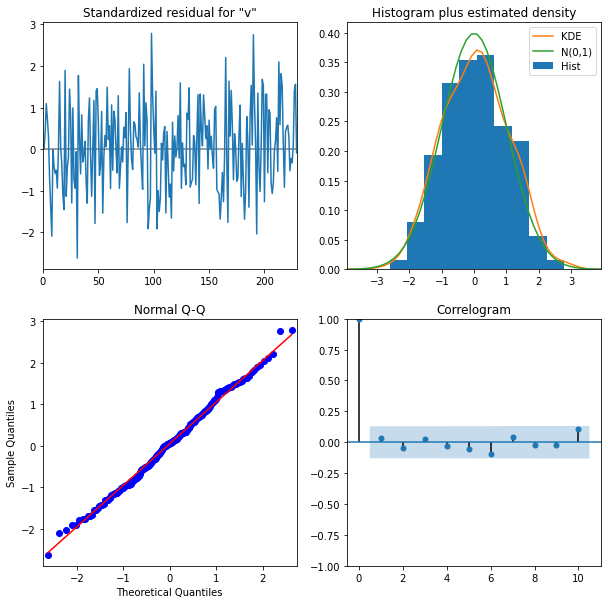

In [ ]:
mol1.plot_diagnostics(figsize=(10,10))
plt.show()
#El modelo 1 cumple con normalidad y con la no correlacion de los residuales JB Y Q
#¿Ver si sus  si existe autocorrelación en los residuales del modelo
#correolograma y jung box en sumarry?

Teniendo en cuenta los resultados obtenidos del modelo 1 respecto a las pruebas de **Ljung Box y Jarque Bera**, los respectivos p-valores son iguales a 0.56 (**0.56>0.05**) (H0: autocorrelación nula) y 0.45 (**0.45>0.05**)  (H0: Normalidad). Esto quiere decir que los residuales no son correlacionados y tienen distribución normal con un nivel de confianza del 95%.

En el gráfico de la ACF, se evidencia que todos los valores están dentro de la banda de confianza del 95%, por ende, los residuales no son correlacionados. A su vez, los lags oscilan alrededor del 0 con varianza constante como se puede apreciar en el primer gráfico.
También, la gráfica de la normalidad Q-Q, nos muestra que los datos siguen una distribución normal.
El histograms de densidad estimada nos deja ver una similitud entre la línea teórica (verde) y la línea de densidad empírica (naranja).


In [ ]:
pred = mol1.get_prediction(start=232, end=237, dynamic=False)
pred_ci = pred.conf_int(alpha=0.05)

In [ ]:
fore = mol1.get_forecast(6)
fore_ci = fore.conf_int()
xt_pred = np.concatenate((hoja1.valor, fore.predicted_mean))

TypeError: ignored

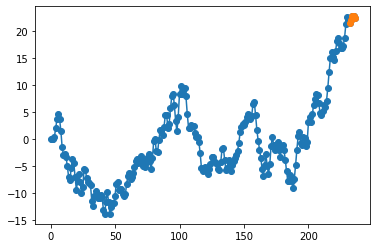

In [ ]:
plt.plot(xt_pred, marker="o")
plt.plot(range(232,237,1),xt_pred[232:237], marker="o")
plt.plot(range(232,237,1), pred_ci[:,0], marker="o", color="green")
plt.plot(range(232,237,1), pred_ci[:,1], marker="o", color="green")
plt.show()

# **HOJA 2**

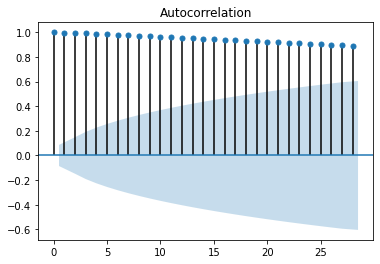

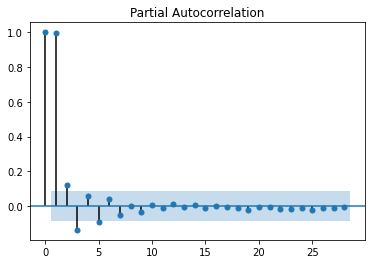

In [ ]:
plot_acf(hoja2.value)
plt.show()
plot_pacf(hoja2.value, method="ywm")
plt.show()

En el **ACF**, notamos que todos los rezagos sobrepasan la banda de confianza del 95%. Se observa un decaimiento lento debido a la tendencia en la serie. También significa que existe un comportamiento estacional y demuestra que existe una alta correlación de cada dato con sus respectivos valores anteriores.

En la **PACF**, sobresalen los 3 primeros rezagos por fuera de la banda de confianza del 95%, indicando un comportamiento estacional. El resto de lags oscilan o se mantienen por debajo del 0 y dentro de la banda de confianza, por ello no hay correlación entre los datos. Los lags 1 y 2 están correlacionados con sus valores anteriores de manera positiva, mientras que el lag 3 está correlacionado de forma negativa.

-
Cola - Corte(3)

-
Cola - Corte(2)

(-0.18282635528006955,
 0.9405379503085114,
 3,
 517,
 {'1%': -3.443061925077973,
  '5%': -2.8671466525252014,
  '10%': -2.5697561378507907},
 1398.8162639808165)

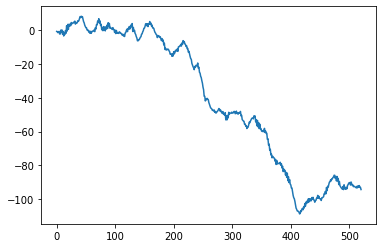

In [ ]:
hoja2.value.plot()
adfuller(hoja2.value)

In [ ]:
adfuller(hoja2.value.diff().dropna()) #(d = 1)

(-7.524055501820424,
 3.724992856728212e-11,
 2,
 517,
 {'1%': -3.443061925077973,
  '5%': -2.8671466525252014,
  '10%': -2.5697561378507907},
 1395.0181874557543)

Al realizar la prueba de Dickey-Fuller, obtenemos un p-valor de **0.94>0.05**. Con este resultado, reconocemos que no es estacionaria, rechazamos la hipótesis nula de que existe una raíz nula y, por consiguiente, debemos tomar una diferencia.

> Bloc con sangría




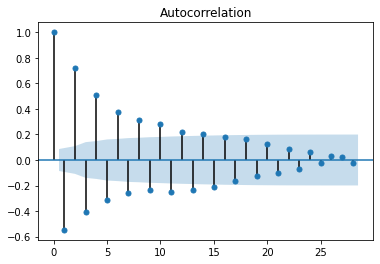

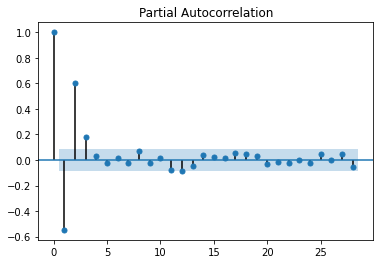

In [ ]:
plot_acf(hoja2.value.diff().dropna())
plt.show()
plot_pacf(hoja2.value.diff().dropna(), method="ywm")
plt.show()

-
ARIMA(3,1,0)

-
ARIMA(12,1,0)

In [ ]:
mol2_1 = ARIMA(hoja1.valor, order = (3,1,0)).fit()
mol2_2 = ARIMA(hoja1.valor,order = (5,1,0)).fit()

In [ ]:
mol2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Tue, 04 Oct 2022   AIC                            657.723
Time:                        03:22:50   BIC                            671.475
Sample:                             0   HQIC                           663.270
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -323.978
Date:                Tue, 04 Oct 2022   AIC                            659.957
Time:                        03:23:02   BIC                            680.585
Sample:                             0   HQIC                           668.278
                                - 231                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9878      0.066     14.892      0.000       0.858       1.118
ar.L2         -0.9659      0.096    -10.056      0.000      -1.154      -0.778
ar.L3          0.5030      0.114      4.420      0.000       0.280       0.726
ar.L4         -0.0909      0.096     -0.943      0.346      -0.280       0.098
ar.L5          0.0034      0.068      0.050      0.960      -0.131       0.138
sigma2         0.9724      0.102      9.545      0.000       0.773       1.172
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.98   Prob(JB):                         0.48
Heteroskedasticity (H):               1.18   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mol2_1.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.9507,0.059,16.213,0.000,0.836,1.066
ar.L2,-0.8858,0.065,-13.691,0.000,-1.013,-0.759
ar.L3,0.4167,0.060,6.920,0.000,0.299,0.535
sigma2,0.9800,0.103,9.481,0.000,0.777,1.183


In [ ]:
abs(roots((-0.4167,0.8858, -0.9507,1)))

array([1.6294354 , 1.21358354, 1.21358354])

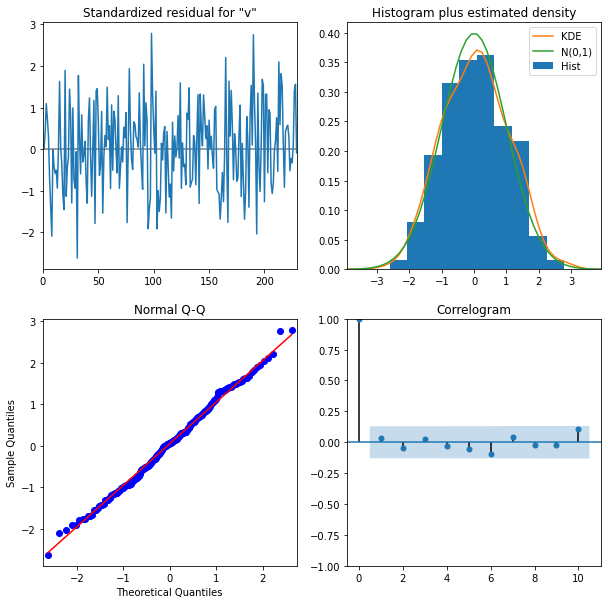

In [ ]:
mol2_1.plot_diagnostics(figsize=(10,10))
plt.show()